In [4]:
# check the columns name
import pandas as pd

url = "/content/drive/MyDrive/Finningley.csv"
df = pd.read_csv(url, header=1)

print(df.columns)

Index(['month', 'day', 'hour', 'Dry Bulb Temp', 'Rel Humidity',
       'Global Horiz Rad', 'Diffuse Rad', 'Wind Speed', 'Wind Direction',
       'Unnamed: 9'],
      dtype='object')


In [3]:
#download the shared windrose file
!pip install git+https://github.com/python-windrose/windrose

  Cloning https://github.com/python-windrose/windrose to /tmp/pip-req-build-95tr9e9v
  Running command git clone --filter=blob:none --quiet https://github.com/python-windrose/windrose /tmp/pip-req-build-95tr9e9v
  Resolved https://github.com/python-windrose/windrose to commit 063876ddf8750f56ee76a687a92c98b6cfd0b05b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for windrose: filename=windrose-1.9.3.dev2+g063876d-py3-none-any.whl size=20519 sha256=0e3788aa93eb68ee6d3de19249782d7b476fd2d7e281b912c63e392f326937a9
  Stored in directory: /tmp/pip-ephem-wheel-cache-poa1844h/wheels/c3/94/6d/9bd04f010fccabdccb450d1be6ada19551192c9d7f7917f4e4
Successfully built windrose


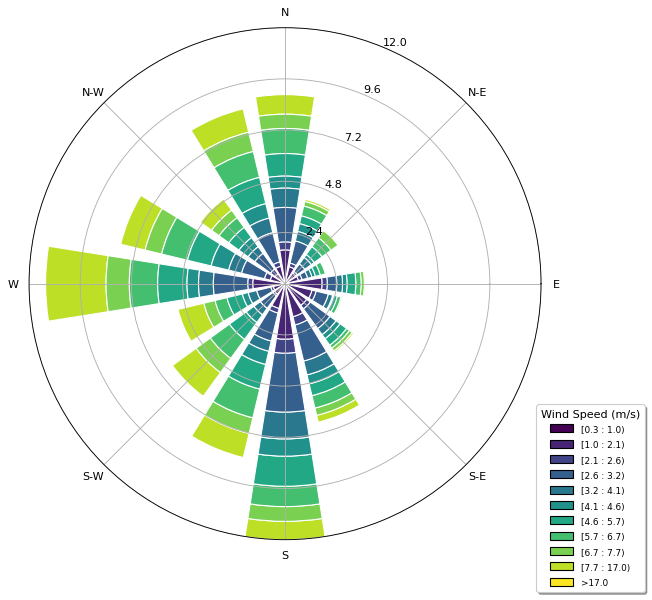

In [13]:
# Annually Windrose

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from windrose import WindroseAxes

url = "/content/drive/MyDrive/Finningley.csv"
df = pd.read_csv(url, header=1)

df['Wind Speed'] = pd.to_numeric(df['Wind Speed'], errors='coerce')
df['Wind Direction'] = pd.to_numeric(df['Wind Direction'], errors='coerce')

df.dropna(subset=['Wind Speed', 'Wind Direction'], inplace=True)
df = df[df["Wind Direction"] != 0]

num_bins = 10
percentiles = np.linspace(0, 100, num_bins + 1)
bins = np.percentile(df['Wind Speed'], percentiles)

ax = WindroseAxes.from_ax()
ax.bar(df['Wind Direction'].values, df['Wind Speed'].values, bins=bins, normed=True, opening=0.8, edgecolor='white')
ax.set_legend(loc='lower right', bbox_to_anchor=(1.2, -0.1), title='Wind Speed (m/s)', fancybox=True, shadow=True)

# Activate the grid without directly setting the style
ax.grid(True)

# Iterate over all radial grid lines and set the dashed line style
#for line in ax.yaxis.get_gridlines():
    #line.set_linestyle('')
    #line.set_color('#D3D3D3')


ax.spines['polar'].set_visible(True)
plt.show()

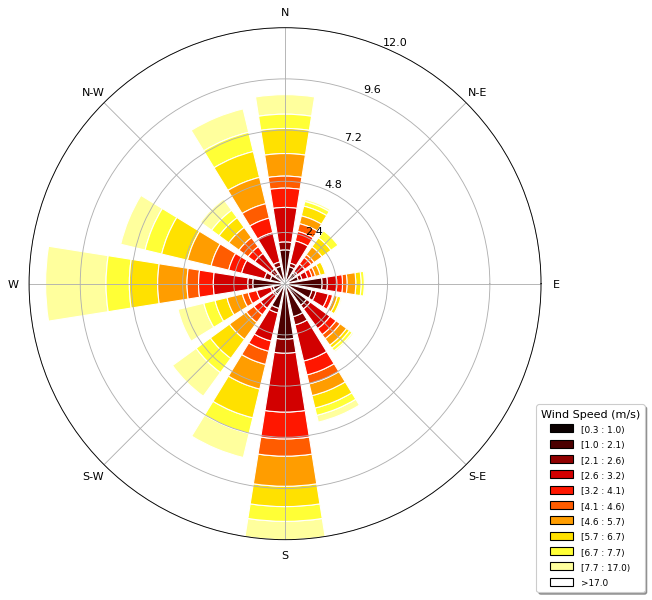

In [14]:
# Annually Windrose Red

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from windrose import WindroseAxes
import matplotlib.cm as cm

url = "/content/drive/MyDrive/Finningley.csv"
df = pd.read_csv(url, header=1)

df['Wind Speed'] = pd.to_numeric(df['Wind Speed'], errors='coerce')
df['Wind Direction'] = pd.to_numeric(df['Wind Direction'], errors='coerce')

df.dropna(subset=['Wind Speed', 'Wind Direction', 'Dry Bulb Temp'], inplace=True)
df = df[df["Wind Direction"] != 0]

num_bins = 10
percentiles = np.linspace(0, 100, num_bins + 1)
speed_bins = np.percentile(df['Wind Speed'], percentiles)

ax = WindroseAxes.from_ax()
ax.bar(df['Wind Direction'].values, df['Wind Speed'].values, normed=True, bins=speed_bins, opening=0.8, edgecolor='white', cmap=cm.hot)
ax.set_legend(loc='lower right', bbox_to_anchor=(1.2, -0.1), title='Wind Speed (m/s)', fancybox=True, shadow=True)
plt.show()

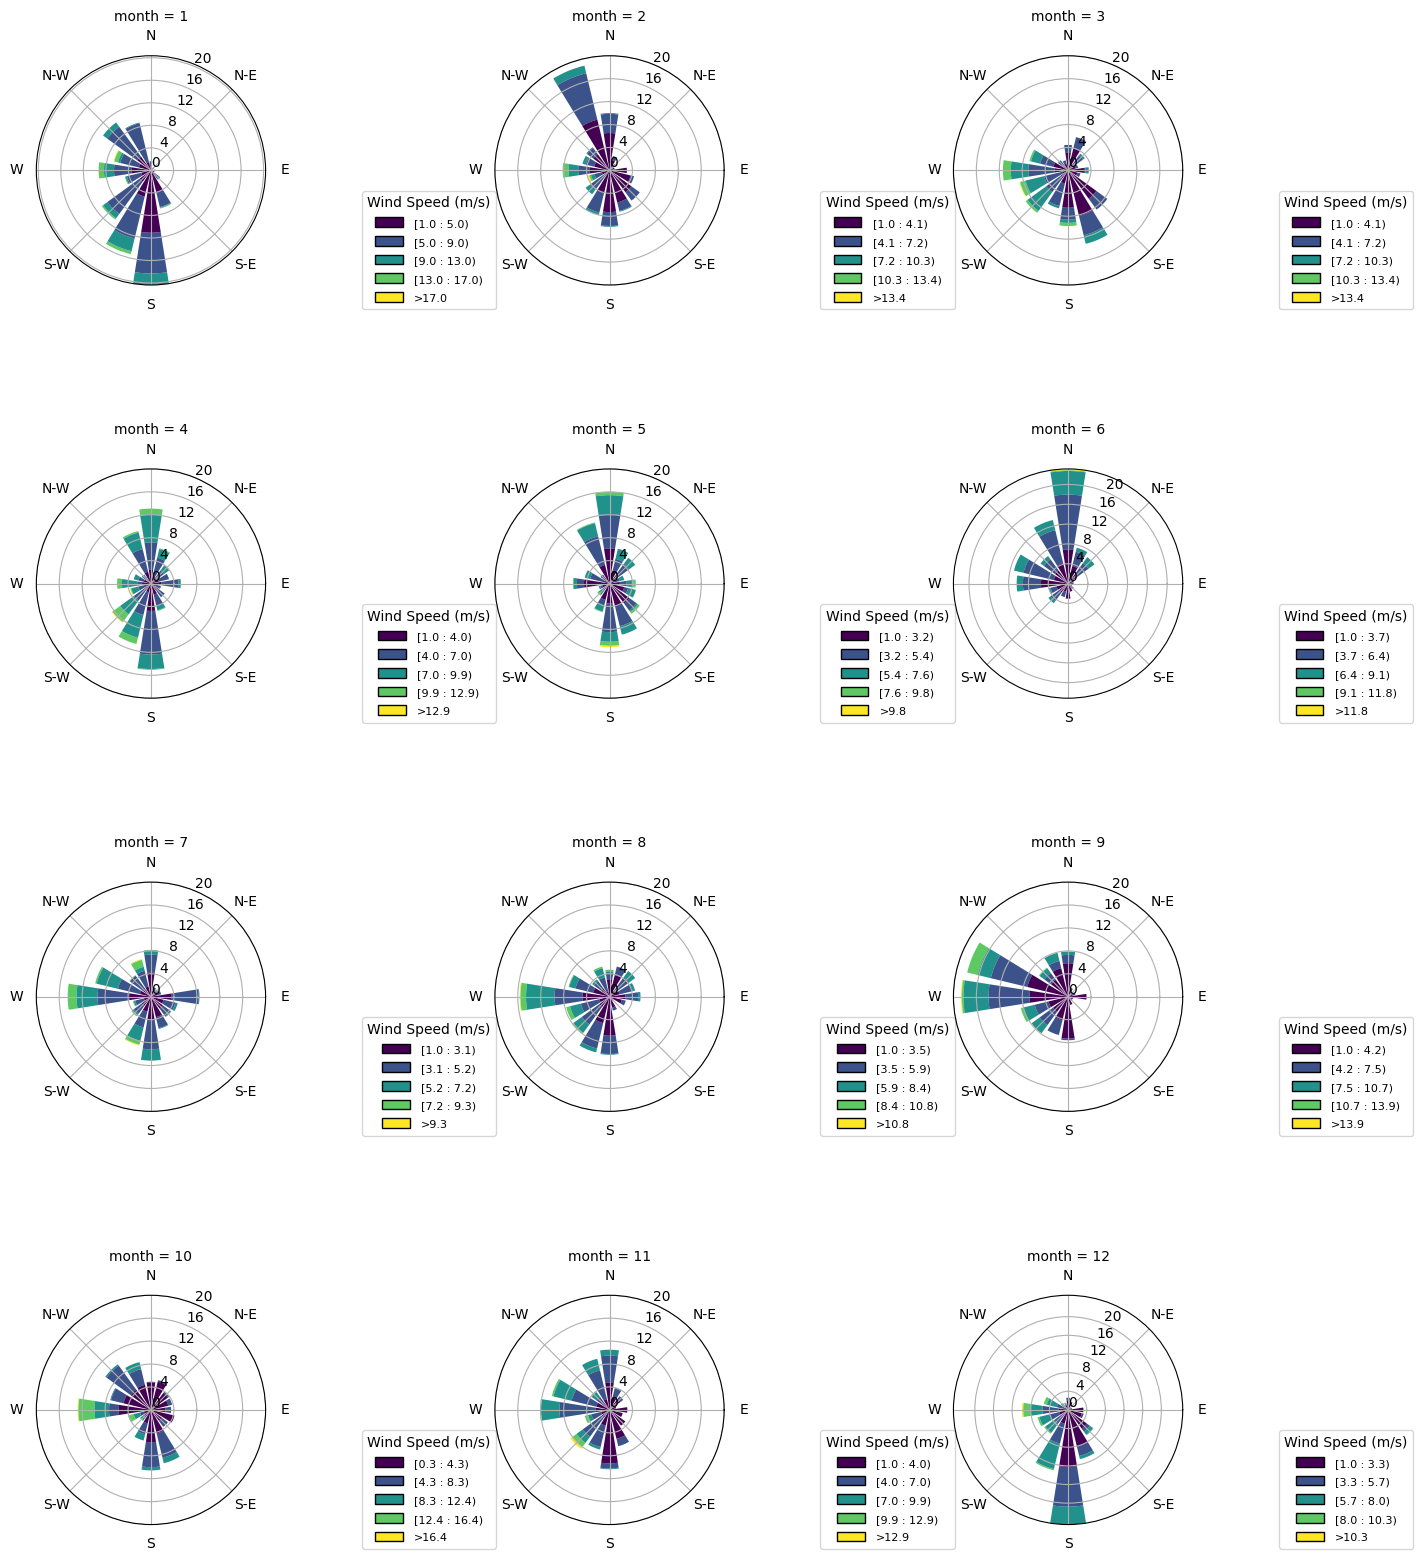

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from windrose import WindroseAxes, plot_windrose

import matplotlib.pyplot as plt
from windrose import WindroseAxes
from matplotlib.projections import register_projection

# Check and add the name attribute
if not hasattr(WindroseAxes, 'name'):
    WindroseAxes.name = 'windrose'

# Register for Projection
register_projection(WindroseAxes)


url = r"/content/drive/MyDrive/Finningley.csv"
df = pd.read_csv(url, header=1)

df['Wind Direction'] = pd.to_numeric(df['Wind Direction'], errors='coerce')
df['Wind Speed'] = pd.to_numeric(df['Wind Speed'], errors='coerce')
df = df.dropna(subset=['Wind Direction', 'Wind Speed'])

df.dropna(subset=['Wind Speed', 'Wind Direction'], inplace=True)
df = df[df["Wind Direction"] != 0]

def plot_windrose_subplots(data, *, direction, var, color=None, **kwargs):
    """在每个子图上绘制风玫瑰图的包装函数"""
    ax = plt.gca()
    ax = WindroseAxes.from_ax(ax=ax)
    plot_windrose(direction_or_df=data[direction], var=data[var], ax=ax, **kwargs)


g = sns.FacetGrid(
    df,
    col="month",  # Use the "month" column to create a subfigure for each subfigure.
    col_wrap=3,  # Up to 3 subgraphs per row
    subplot_kws={"projection": "windrose"},
    sharex=False,
    sharey=False,
    despine=False,
    height=4,
)

num_bins = 5
percentiles = np.linspace(0, 100, num_bins + 1)
bins = np.percentile(df['Wind Speed'], percentiles)

g.map_dataframe(
    plot_windrose_subplots,
    direction="Wind Direction",
    var="Wind Speed",
    normed=True,
    bins=num_bins,
    calm_limit=0.1,
    kind="bar",
)

# Set the same y-axis range for each subplot
y_ticks = range(0, 21, 4)
for ax in g.axes.flat:
    ax.set_legend(
        title=r"Wind Speed (m/s)", bbox_to_anchor=(2, -0.1), loc="lower right"
    )
    ax.set_rgrids(y_ticks, y_ticks)


# Adjusting the spacing between subgraphs
plt.subplots_adjust(wspace=1, hspace=0.6)
plt.show()